<a href="https://colab.research.google.com/github/jake314jake/facial-recognition/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Face recognition** is a technology that involves identifying and verifying individuals based on their facial features.

**VGG-Face Library**


VGG Face is a deep learning model specifically designed for face recognition.

In [1]:
#https://github.com/ma7555/keras-vggface.git   also https://github.com/jake314jake/keras-vggface
!pip install git+https://github.com/ma7555/keras-vggface.git

  Cloning https://github.com/ma7555/keras-vggface.git to /tmp/pip-req-build-asd80uxw
  Running command git clone --filter=blob:none --quiet https://github.com/ma7555/keras-vggface.git /tmp/pip-req-build-asd80uxw
  Resolved https://github.com/ma7555/keras-vggface.git to commit 97a512377f9ead550a74595b657c7ec9b8161e75
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.1 MB/s eta 0:00:00
  Created wheel for keras-vggface: filename=keras_vggface-0.7-py3-none-any.whl size=8318 sha256=2c8b445233d87f8c6883bf2f8ab62b47665c8700e96973f762cd450927ecfcb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-wqjn25x4/wheels/e3/b0/c4/d248c583f944c032a2429b2c0b4bfba1f24ac9c50ca6692eaf
Successfully built keras-vggface


In [2]:
!pip install tensorflow

check **version** of keras vggface

In [3]:
#version
import keras_vggface
print(keras_vggface.__version__)

0.7


**MTCNN**, which stands for Multi-task Cascaded Convolutional Networks, is a deep learning model used for face detection.

In [4]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.1 MB/s eta 0:00:00


In [5]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


Saving photo_2023-11-22_20-23-17.jpg to photo_2023-11-22_20-23-17.jpg
1/1 [==============================] - 0s 167ms/step


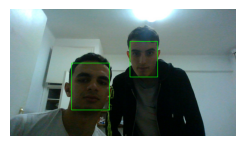

In [6]:
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from mtcnn.mtcnn import MTCNN
import numpy as np
from google.colab import files

# Upload image using Colab's files.upload()
uploaded_files = files.upload()
uploaded_image_path = list(uploaded_files.keys())[0]

def extract_face(image_path, required_size=(224, 224)):
    # load image from file using cv2
    pixels = cv2.imread(image_path)
    # convert BGR to RGB
    pixels = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)

    # plot original image with green boxes
    original_image = np.copy(pixels)
    for result in results:
        x, y, width, height = result['box']
        x1, y1, x2, y2 = x, y, x + width, y + height
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)


    # extract and resize faces
    face_arrays = []
    for result in results:
        x, y, width, height = result['box']
        x2, y2 = x + width, y + height
        # extract the face
        face = pixels[y:y2, x:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = np.asarray(image)
        face_arrays.append(face_array)




    # show the plot
    plt.axis('off')
    plt.show()

# load the photo and extract the face
extract_face(uploaded_image_path)


# New section

Face identification

Saving photo_2023-11-22_20-23-17.jpg to photo_2023-11-22_20-23-17 (1).jpg
1/1 [==============================] - 1s 1s/step
b' Gabriel_Mercado': 5.42%
1/1 [==============================] - 0s 204ms/step
b' Tom_Daley': 17.32%


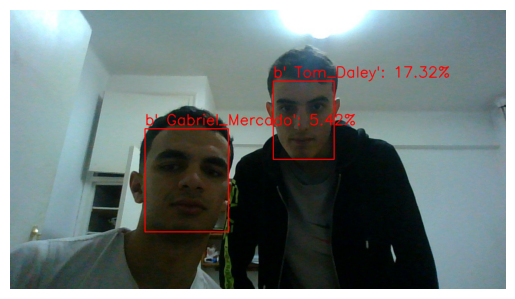

In [ ]:
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from numpy import asarray, expand_dims
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions

# Upload image file
uploaded = files.upload()

# Get the uploaded image file name
file_name = list(uploaded.keys())[0]

# Load image from file
pixels = plt.imread(file_name)

# Create the detector, using default weights
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(pixels)

# Create a VGGFace model
model = VGGFace(model='resnet50')

# Get image dimensions
height, width, _ = pixels.shape

# Calculate scaling factors for font and box size
font_scale = max(height, width) / 1000.0
box_thickness = max(height, width) // 500

# Process each detected face
for i, face in enumerate(faces):
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # Extract the face
    face_pixels = pixels[y1:y2, x1:x2]

    # Resize pixels to the model size
    face_image = Image.fromarray(face_pixels)
    face_image = face_image.resize((224, 224))
    face_array = asarray(face_image)

    # Convert face into samples
    face_array = face_array.astype('float32')
    samples = expand_dims(face_array, axis=0)

    # Prepare the face for the model
    samples = preprocess_input(samples, version=2)

    # Perform prediction
    predictions = model.predict(samples)

    # Convert prediction into names
    results = decode_predictions(predictions)

    # Get class label and confidence
    label = results[0][0][0]
    confidence = results[0][0][1] * 100

    # Draw bounding box with label using cv2
    color = (0, 255, 0) if confidence > 70 else (255, 0, 0)  # Green or red color
    cv2.rectangle(pixels, (int(x1), int(y1)), (int(x2), int(y2)), color, box_thickness)
    cv2.putText(pixels, f'{label}: {confidence:.2f}%', (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, box_thickness)
    print(f'{label}: {confidence:.2f}%')

# Display the image with bounding boxes
plt.imshow(pixels)
plt.axis('off')
plt.show()


Face **Verification**

Upload Known


Saving 2.jpg to 2 (3).jpg
Saving photo_2023-11-22_20-23-17.jpg to photo_2023-11-22_20-23-17 (4).jpg
1/1 [==============================] - 3s 3s/step


Saving photo_2023-11-20_11-43-08.jpg to photo_2023-11-20_11-43-08 (3).jpg
1/1 [==============================] - 1s 1s/step
Verification Results:
Comparison with known face 1:
> Face is NOT a Match (0.575 > 0.500)
Comparison with known face 2:
> Face is a Match (0.226 <= 0.500)


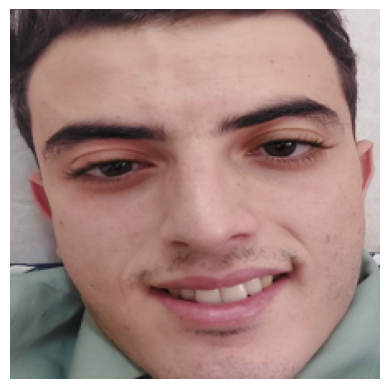

In [10]:
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = plt.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [extract_face(f) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print('> Face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('> Face is NOT a Match (%.3f > %.3f)' % (score, thresh))

# Upload known face files
print("Upload Known faces")
uploaded_known_files = files.upload()
known_filenames = list(uploaded_known_files.keys())

# get embeddings for the known faces
known_embeddings = get_embeddings(known_filenames)

# Upload the image for verification
print("Upload new face")
uploaded_files = files.upload()
uploaded_image_path = list(uploaded_files.keys())[0]

# extract face and get embedding for the uploaded image
uploaded_face = extract_face(uploaded_image_path)
uploaded_embedding = get_embeddings([uploaded_image_path])[0]

# verify the uploaded image against known faces
print('Verification Results:')
for i, known_embedding in enumerate(known_embeddings):
    print(f'Comparison with known face {i + 1}:')
    is_match(known_embedding, uploaded_embedding)

# Display the uploaded image
plt.imshow(uploaded_face)
plt.axis('off')
plt.show()
